In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()

In [5]:
type(data)

sklearn.utils.Bunch

In [7]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

In [10]:
import numpy as np
df = pd.DataFrame(X, columns=col_names)
# 例として相関の高い特徴量を生成。相関が高いので、どちらかを削除できる
df.loc[:, "MedInc_sqrt"] = df["MedInc"].apply(np.sqrt)
# ピアソンの相関行列
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


# マンガでわかる統計学入門

- 統計学では実現値を小文字、確率変数を大文字で表す
    - 標本の抽出のたびに変わる推定量は確率変数であると言える
        - 一つの無作為標本がどのような数値を取るのかは不確実だから、実現地は小文字 x で、確率変数 X は大文字で表せる
        - 母集団から求めた平均値は実現値だが、標本平均は確率変数である
            - $ Xの標本平均 = \frac{X_1 + X_2 + ... + X_n}{n} $
- カイ二乗分布
    - 母分散の区間推定で使う

# 統計学大百科事典
- カイ二乗分布
    - p.102) 母集団が正規分布に従っているとき、標本の偏差平方和（分散の分子）が従う確率変数がカイ二乗分布
    - p.104) $ Y_1, Y_2, ..., Y_n $ がそれぞれ標準正規分布 $ N(0, 1^2) $ に従っているとしたとき、 $ X = Y_1^2 + Y_2^2 + ... + Y_n^2 $ とおく。Xが従う確率分布を自由度nのカイ二乗分布といい、 $ χ^2(n) $ で表す

# Python で学ぶあたらしい統計学の教科書

- p.247) 検定による変数選択
    - 例) $ ビールの売上 ~ N(\beta_0 + \beta_1 * 気温, \sigma^2) $
    - 統計的仮説検定を用いる場合、帰無仮説が棄却できた場合には、「モデルに気温という説明変数は必要だ」となる。さもなくば「モデルに気温は不要で取り除くべき」となる
        - 帰無仮説: 説明変数の係数 $ \beta_1 $ は 0 である
            
    

# 単変量特徴量選択
- 統計学をやっとかないと詳細な理解は得られない

# 再帰的特徴量削減

In [2]:
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# 最小二乗法による線形回帰
model = LinearRegression()
# 再帰的特徴量削減
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X, y)

# データセットを変換
X_transformed = rfe.transform(X)
X_transformed

array([[   8.3252,   37.88  , -122.23  ],
       [   8.3014,   37.86  , -122.22  ],
       [   7.2574,   37.85  , -122.24  ],
       ...,
       [   1.7   ,   39.43  , -121.22  ],
       [   1.8672,   39.43  , -121.32  ],
       [   2.3886,   39.37  , -121.24  ]])

# モデルから特徴量の重要度を得る
## ランダムフォレスト

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# 回帰問題を読み込み
# 1年後の糖尿病の進行度合いを特徴量から予測する問題
data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
print(data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [7]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [10]:
df.sum(axis=0)

age   -1.606354e-13
sex    5.782874e-14
bmi   -3.556044e-13
bp     5.664913e-14
s1    -3.905209e-14
s2     5.865447e-14
s3    -2.021994e-13
s4     1.669567e-13
s5    -1.693238e-13
s6    -1.508494e-13
dtype: float64

In [11]:
# Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples`
# (i.e. the sum of squares of each column totals 1).
f.applymap(lambda x: x ** 2).sum(axis=0)

age    1.0
sex    1.0
bmi    1.0
bp     1.0
s1     1.0
s2     1.0
s3     1.0
s4     1.0
s5     1.0
s6     1.0
dtype: float64

In [13]:
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [15]:
import numpy as np
importances = model.feature_importances_
importances

array([0.06147493, 0.01269431, 0.2864473 , 0.09578049, 0.04552619,
       0.05843025, 0.04956929, 0.01973907, 0.29722588, 0.07311228])

In [16]:
# 係数の大きい順にソート
np.argsort(importances)

array([1, 7, 4, 6, 5, 0, 9, 3, 2, 8])

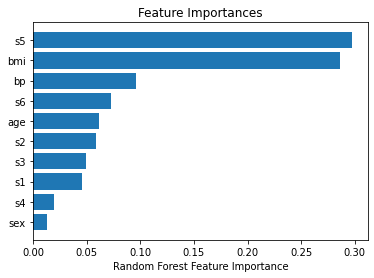

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

idxs = np.argsort(importances)
plt.title("Feature Importances")
plt.barh(range(len(idxs)), importances[idxs], align="center")
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()

## 任意のモデルから特徴量選択


In [18]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(X, y)
# 選ばれた特徴量のインデックスの boolean 表現
support = sfm.get_support()
# 特徴量名
print([x for x, y  in zip(col_names, support) if y])

['bmi', 's5']


In [19]:
X_transformed

array([[ 0.06169621,  0.01990842],
       [-0.05147406, -0.06832974],
       [ 0.04445121,  0.00286377],
       [-0.01159501,  0.02269202],
       [-0.03638469, -0.03199144],
       [-0.04069594, -0.04118039],
       [-0.04716281, -0.06291295],
       [-0.00189471, -0.03581673],
       [ 0.06169621, -0.01495648],
       [ 0.03906215,  0.06773633],
       [-0.08380842, -0.06291295],
       [ 0.01750591, -0.09643322],
       [-0.02884001, -0.03075121],
       [-0.00189471,  0.03839325],
       [-0.02560657, -0.03199144],
       [-0.01806189,  0.03605579],
       [ 0.04229559,  0.05228   ],
       [ 0.01211685,  0.02736771],
       [-0.0105172 , -0.01811827],
       [-0.01806189, -0.00894402],
       [-0.05686312, -0.01190068],
       [-0.02237314, -0.07212845],
       [-0.00405033, -0.0611766 ],
       [ 0.06061839,  0.13359898],
       [ 0.03582872, -0.02595242],
       [-0.01267283,  0.01919903],
       [-0.07734155, -0.0425721 ],
       [ 0.05954058, -0.01599827],
       [-0.02129532,

In [21]:
support

array([False, False,  True, False, False, False, False, False,  True,
       False])

## Lasso 回帰（L1正則化）で学習すると、不要な特徴量の重みが0になりやすいので、特徴量選択として使える
### 『機械学習図鑑』p.46 がわかりやすい